In [1]:
%matplotlib inline

import logging
logging.getLogger('tensorflow').disabled = True

import sys
sys.path.append("../../TransportNets")

import numpy as np
import matplotlib.pyplot as plt; plt.style.use('ggplot')

import tensorflow as tf
import tensorflow_probability as tfp

from Models.NVP import NVP
from Probability.Distributions import RotatedBanana
from Probability.MCMC import MH2d

tfd = tfp.distributions
tfb = tfp.bijectors

## Train the Normalizing Flow
First, we train the flow to map a double banana distribution to a guassian. The end goal is to perform conditional sampling using MCMC along a part of the distribution where we cross 2 different 'modes'. 

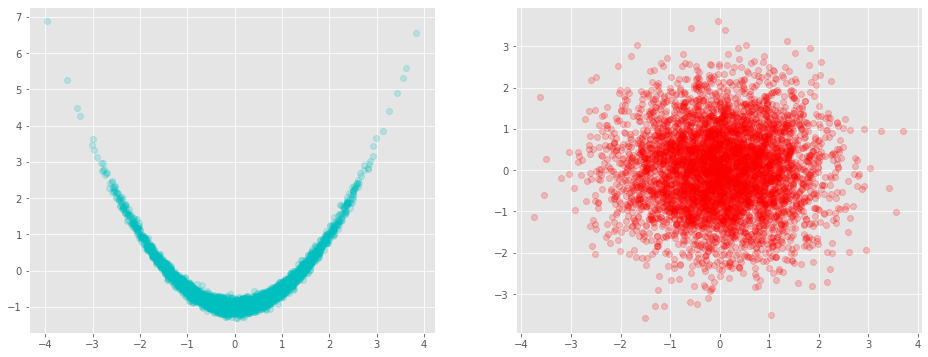

In [2]:
# Distrubtion that we want to learn to map to gaussian 
num_samples = 5000

target = RotatedBanana(num_samples, 0.0, start_height = -1)
latent = tf.random.normal([num_samples,2],mean=0.0,stddev=1.0)

# Plot them
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(121); ax2 = plt.subplot(122);
ax1.plot(target[:,0], target[:,1], 'co', alpha = .2)
ax2.plot(latent[:,0], latent[:,1], 'ro', alpha = .2)

In [3]:
# Create model object
nvp = NVP(num_layers=9, neuron_list=[150,150])

# Create optimizer and compile nvp with it
opt = tf.keras.optimizers.Adam(learning_rate=1e-5, epsilon=1e-06)
nvp.compile(opt)

# Perform a forward pass to initialize variables
_ = nvp(latent)

In [4]:
# Define training options
n_epochs = 400
batch_size = 50

# Put the target data in a format the tf likes.
dataset = tf.data.Dataset.from_tensor_slices(target)
dataset = dataset.shuffle(buffer_size=5000).batch(batch_size)

# Train the model with the new callback
nvp.batch_norm_mode(True)
history = nvp.fit(dataset, epochs=n_epochs)  # Pass callback to training

# Set the training variables to not update when doing passes
nvp.batch_norm_mode(False)

Epoch 1/400
100/100 [==============================] - 2s 20ms/step - Negative Log Likelihood: 2.3088
Epoch 2/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 2.0809
Epoch 3/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 1.8581
Epoch 4/400
100/100 [==============================] - 2s 20ms/step - Negative Log Likelihood: 1.6823
Epoch 5/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 1.5503
Epoch 6/400
100/100 [==============================] - 2s 21ms/step - Negative Log Likelihood: 1.4527
Epoch 7/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 1.3620
Epoch 8/400
100/100 [==============================] - 2s 20ms/step - Negative Log Likelihood: 1.2936
Epoch 9/400
100/100 [==============================] - 3s 26ms/step - Negative Log Likelihood: 1.2212
Epoch 10/400
100/100 [==============================] - 2s 18ms/step - Negative Lo

100/100 [==============================] - 2s 18ms/step - Negative Log Likelihood: 0.6241
Epoch 81/400
100/100 [==============================] - 2s 18ms/step - Negative Log Likelihood: 0.6438
Epoch 82/400
100/100 [==============================] - 2s 18ms/step - Negative Log Likelihood: 0.6346
Epoch 83/400
100/100 [==============================] - 2s 17ms/step - Negative Log Likelihood: 0.6220
Epoch 84/400
100/100 [==============================] - 2s 17ms/step - Negative Log Likelihood: 0.6402
Epoch 85/400
100/100 [==============================] - 2s 17ms/step - Negative Log Likelihood: 0.6247
Epoch 86/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 0.6302
Epoch 87/400
100/100 [==============================] - 2s 23ms/step - Negative Log Likelihood: 0.6291
Epoch 88/400
100/100 [==============================] - 2s 20ms/step - Negative Log Likelihood: 0.6316
Epoch 89/400
100/100 [==============================] - 2s 20ms/step - Negative Log Li

100/100 [==============================] - 2s 16ms/step - Negative Log Likelihood: 0.5788
Epoch 160/400
100/100 [==============================] - 2s 24ms/step - Negative Log Likelihood: 0.5652
Epoch 161/400
100/100 [==============================] - 2s 21ms/step - Negative Log Likelihood: 0.5785
Epoch 162/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 0.5734
Epoch 163/400
100/100 [==============================] - 2s 17ms/step - Negative Log Likelihood: 0.5655
Epoch 164/400
100/100 [==============================] - 2s 17ms/step - Negative Log Likelihood: 0.5793
Epoch 165/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 0.5698
Epoch 166/400
100/100 [==============================] - 2s 22ms/step - Negative Log Likelihood: 0.5740
Epoch 167/400
100/100 [==============================] - 2s 17ms/step - Negative Log Likelihood: 0.5565
Epoch 168/400
100/100 [==============================] - 2s 20ms/step - Negati

100/100 [==============================] - 2s 21ms/step - Negative Log Likelihood: 0.5489
Epoch 238/400
100/100 [==============================] - 2s 21ms/step - Negative Log Likelihood: 0.5423
Epoch 239/400
100/100 [==============================] - 2s 21ms/step - Negative Log Likelihood: 0.5401
Epoch 240/400
100/100 [==============================] - 2s 22ms/step - Negative Log Likelihood: 0.5503
Epoch 241/400
100/100 [==============================] - 2s 18ms/step - Negative Log Likelihood: 0.5416
Epoch 242/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 0.5458
Epoch 243/400
100/100 [==============================] - 2s 22ms/step - Negative Log Likelihood: 0.5347
Epoch 244/400
100/100 [==============================] - 2s 24ms/step - Negative Log Likelihood: 0.5431
Epoch 245/400
100/100 [==============================] - 2s 19ms/step - Negative Log Likelihood: 0.5406
Epoch 246/400
100/100 [==============================] - 2s 19ms/step - Negati

100/100 [==============================] - 1s 11ms/step - Negative Log Likelihood: 0.5265
Epoch 317/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5269
Epoch 318/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5328
Epoch 319/400
100/100 [==============================] - 1s 9ms/step - Negative Log Likelihood: 0.5290
Epoch 320/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5273
Epoch 321/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5218
Epoch 322/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5244
Epoch 323/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5274
Epoch 324/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5356
Epoch 325/400
100/100 [==============================] - 1s 8ms/step - Negative Log Li

100/100 [==============================] - 1s 10ms/step - Negative Log Likelihood: 0.5140
Epoch 396/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5154
Epoch 397/400
100/100 [==============================] - 1s 9ms/step - Negative Log Likelihood: 0.5158
Epoch 398/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5044
Epoch 399/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5079
Epoch 400/400
100/100 [==============================] - 1s 8ms/step - Negative Log Likelihood: 0.5142


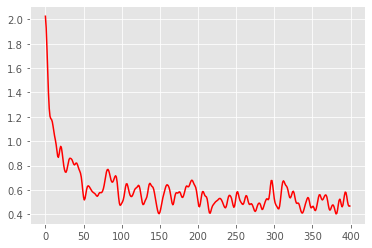

In [5]:
from scipy.ndimage.filters import gaussian_filter1d
ysmoothed = gaussian_filter1d(history.history['Negative Log Likelihood'], sigma=2)
plt.plot(ysmoothed, color = 'r')

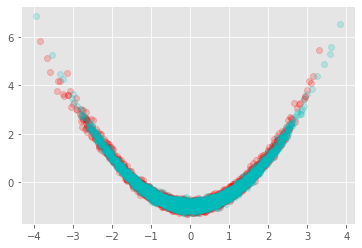

In [6]:
# Plot to make sure it worked
forward_pass = nvp(tf.random.normal([num_samples,2],mean=0.0,stddev=1.0))
plt.plot(forward_pass[:, 0], forward_pass[:, 1], 'ro', alpha=.2)
plt.plot(target[:,0], target[:,1], 'co', alpha = .2)

## Conditional Sampling using Metropolis Hastings

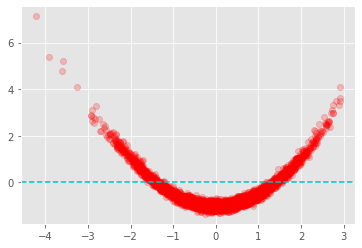

In [7]:
# We want to draw conditional samples from about y = 0.0
y_star = 0.0

forward_pass = nvp(tf.random.normal([5000,2],mean=0.0,stddev=1.0))
plt.plot(forward_pass[:, 0], forward_pass[:, 1], 'ro', alpha=.2)
plt.axhline(y=y_star, color='c', linestyle='--')

In [8]:
# Run the algorithm
acc_rate, samples = MH2d(nvp, y_star = 0.0)
print(acc_rate)

it: 0 time: 1.9357621669769287
it: 1000 time: 2.6869418621063232
it: 2000 time: 2.6466033458709717
it: 3000 time: 2.582644462585449
it: 4000 time: 2.7214579582214355
it: 5000 time: 2.7112112045288086
it: 6000 time: 2.6056203842163086
it: 7000 time: 2.682537794113159
it: 8000 time: 2.7420947551727295
it: 9000 time: 2.686209201812744
0.0675


[(-3.0, 3.0)]

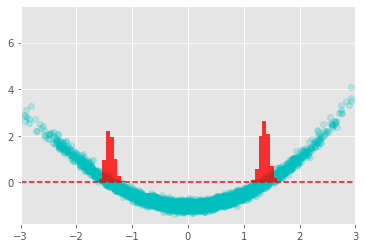

In [9]:
# Plot the conditional samples
fig, ax = plt.subplots()
ax.plot(forward_pass[:, 0], forward_pass[:, 1], 'co', alpha=.2)
ax.hist(samples, 150, (-5, 5), color='r', alpha=.8, density=True, zorder=10)
ax.axhline(y=y_star, color='r', linestyle='--')
ax.set(xlim=(-3, 3))